In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [2]:
#Parameters
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

EPOCHS = 2000
TEST_SIZE = 0.2

In [3]:
data_df = pd.read_csv("wine.csv",header=None)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data_df.shape

(178, 14)

In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
for col in data_df.columns:
    print(f'Col: {col} | {data_df[col].unique()}')  ##to find the unique values
#We can also use plotting methods

Col: 0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col: 1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.

In [8]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

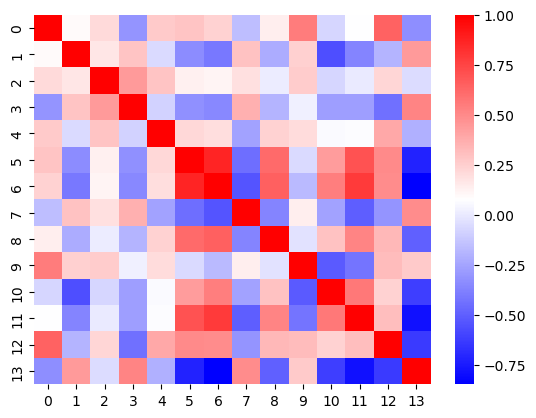

In [9]:
sns.heatmap(data_df.corr(),cmap='bwr')

In [10]:
labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [11]:
features_df = data_df.drop(data_df.columns[-1],axis=1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
X_train,X_test,y_train,y_test = train_test_split(features_df,labels, 
                                                stratify=labels,
                                                test_size=TEST_SIZE,
                                                random_state = RANDOM_STATE)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Prepare Model

In [14]:
#Give feature dimensions
X_train.shape[1]

13

In [15]:
#Create model using tensorflow
model = nn.Sequential(
        nn.Linear( X_train.shape[1],8),
        nn.ReLU(),
        nn.Linear(8,3))
model

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [16]:
#Define loss fn and optimizer compile the model
loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters())


In [17]:
#convert X_train and y_train
train_X= torch.tensor(X_train, dtype=torch.float32)
train_y= torch.tensor(y_train, dtype=torch.int64) #it cannot be float

#convert X_test and y_test
test_X= torch.tensor(X_test, dtype=torch.float32)
test_y= torch.tensor(y_test, dtype=torch.int64) #it cannot be float

In [18]:
#test the model
pred= model(train_X[:1])
pred

tensor([[ 0.3531, -0.3311, -0.2378]], grad_fn=<AddmmBackward0>)

In [19]:
#check the loss fn
loss_fn(pred,train_y[:1]).detach().item()

1.4061098098754883

# Fit Model

In [20]:
#Fit the model

loss_o, loss_t=[], []
for epoch in range(EPOCHS): 
    model.train()
    outputs= model(train_X)
    
    loss = loss_fn(outputs,train_y)
    loss_o.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        outputs= model(test_X)
        tloss= loss_fn(outputs,test_y)
        loss_t.append(tloss.item())
        
        tloss=loss_fn(outputs,test_y)
    print(f'Epoch: {epoch:2d} ; Loss: {loss:.6f} | {tloss:.6f}')
    

Epoch:  0 ; Loss: 1.111255 | 1.068801
Epoch:  1 ; Loss: 1.105234 | 1.062945
Epoch:  2 ; Loss: 1.099229 | 1.057132
Epoch:  3 ; Loss: 1.093264 | 1.051419
Epoch:  4 ; Loss: 1.087360 | 1.045748
Epoch:  5 ; Loss: 1.081564 | 1.040152
Epoch:  6 ; Loss: 1.075865 | 1.034601
Epoch:  7 ; Loss: 1.070224 | 1.029071
Epoch:  8 ; Loss: 1.064645 | 1.023564
Epoch:  9 ; Loss: 1.059099 | 1.018079
Epoch: 10 ; Loss: 1.053596 | 1.012593
Epoch: 11 ; Loss: 1.048130 | 1.007113
Epoch: 12 ; Loss: 1.042694 | 1.001605
Epoch: 13 ; Loss: 1.037295 | 0.996111
Epoch: 14 ; Loss: 1.031916 | 0.990646
Epoch: 15 ; Loss: 1.026543 | 0.985250
Epoch: 16 ; Loss: 1.021214 | 0.979895
Epoch: 17 ; Loss: 1.015912 | 0.974546
Epoch: 18 ; Loss: 1.010662 | 0.969207
Epoch: 19 ; Loss: 1.005441 | 0.963880
Epoch: 20 ; Loss: 1.000236 | 0.958562
Epoch: 21 ; Loss: 0.995075 | 0.953252
Epoch: 22 ; Loss: 0.989961 | 0.947954
Epoch: 23 ; Loss: 0.984871 | 0.942803
Epoch: 24 ; Loss: 0.979812 | 0.937659
Epoch: 25 ; Loss: 0.974758 | 0.932537
Epoch: 26 ; 

Epoch: 294 ; Loss: 0.128162 | 0.122496
Epoch: 295 ; Loss: 0.127382 | 0.121827
Epoch: 296 ; Loss: 0.126611 | 0.121165
Epoch: 297 ; Loss: 0.125848 | 0.120508
Epoch: 298 ; Loss: 0.125093 | 0.119857
Epoch: 299 ; Loss: 0.124345 | 0.119212
Epoch: 300 ; Loss: 0.123605 | 0.118573
Epoch: 301 ; Loss: 0.122873 | 0.117940
Epoch: 302 ; Loss: 0.122149 | 0.117313
Epoch: 303 ; Loss: 0.121434 | 0.116694
Epoch: 304 ; Loss: 0.120724 | 0.116082
Epoch: 305 ; Loss: 0.120021 | 0.115476
Epoch: 306 ; Loss: 0.119327 | 0.114876
Epoch: 307 ; Loss: 0.118639 | 0.114281
Epoch: 308 ; Loss: 0.117959 | 0.113690
Epoch: 309 ; Loss: 0.117285 | 0.113105
Epoch: 310 ; Loss: 0.116617 | 0.112526
Epoch: 311 ; Loss: 0.115957 | 0.111951
Epoch: 312 ; Loss: 0.115303 | 0.111381
Epoch: 313 ; Loss: 0.114655 | 0.110816
Epoch: 314 ; Loss: 0.114016 | 0.110258
Epoch: 315 ; Loss: 0.113381 | 0.109706
Epoch: 316 ; Loss: 0.112753 | 0.109159
Epoch: 317 ; Loss: 0.112131 | 0.108616
Epoch: 318 ; Loss: 0.111516 | 0.108078
Epoch: 319 ; Loss: 0.1109

Epoch: 582 ; Loss: 0.042450 | 0.045529
Epoch: 583 ; Loss: 0.042337 | 0.045428
Epoch: 584 ; Loss: 0.042224 | 0.045327
Epoch: 585 ; Loss: 0.042112 | 0.045227
Epoch: 586 ; Loss: 0.042001 | 0.045127
Epoch: 587 ; Loss: 0.041890 | 0.045028
Epoch: 588 ; Loss: 0.041779 | 0.044929
Epoch: 589 ; Loss: 0.041669 | 0.044831
Epoch: 590 ; Loss: 0.041559 | 0.044733
Epoch: 591 ; Loss: 0.041450 | 0.044635
Epoch: 592 ; Loss: 0.041341 | 0.044537
Epoch: 593 ; Loss: 0.041233 | 0.044440
Epoch: 594 ; Loss: 0.041125 | 0.044344
Epoch: 595 ; Loss: 0.041018 | 0.044248
Epoch: 596 ; Loss: 0.040911 | 0.044153
Epoch: 597 ; Loss: 0.040804 | 0.044057
Epoch: 598 ; Loss: 0.040698 | 0.043962
Epoch: 599 ; Loss: 0.040592 | 0.043868
Epoch: 600 ; Loss: 0.040487 | 0.043773
Epoch: 601 ; Loss: 0.040382 | 0.043680
Epoch: 602 ; Loss: 0.040278 | 0.043586
Epoch: 603 ; Loss: 0.040174 | 0.043493
Epoch: 604 ; Loss: 0.040070 | 0.043400
Epoch: 605 ; Loss: 0.039967 | 0.043308
Epoch: 606 ; Loss: 0.039864 | 0.043216
Epoch: 607 ; Loss: 0.0397

Epoch: 862 ; Loss: 0.022320 | 0.027218
Epoch: 863 ; Loss: 0.022270 | 0.027162
Epoch: 864 ; Loss: 0.022220 | 0.027107
Epoch: 865 ; Loss: 0.022171 | 0.027052
Epoch: 866 ; Loss: 0.022121 | 0.026997
Epoch: 867 ; Loss: 0.022072 | 0.026942
Epoch: 868 ; Loss: 0.022022 | 0.026888
Epoch: 869 ; Loss: 0.021973 | 0.026834
Epoch: 870 ; Loss: 0.021924 | 0.026780
Epoch: 871 ; Loss: 0.021875 | 0.026726
Epoch: 872 ; Loss: 0.021827 | 0.026673
Epoch: 873 ; Loss: 0.021778 | 0.026620
Epoch: 874 ; Loss: 0.021730 | 0.026568
Epoch: 875 ; Loss: 0.021681 | 0.026516
Epoch: 876 ; Loss: 0.021633 | 0.026464
Epoch: 877 ; Loss: 0.021585 | 0.026412
Epoch: 878 ; Loss: 0.021537 | 0.026360
Epoch: 879 ; Loss: 0.021490 | 0.026309
Epoch: 880 ; Loss: 0.021442 | 0.026257
Epoch: 881 ; Loss: 0.021395 | 0.026206
Epoch: 882 ; Loss: 0.021348 | 0.026156
Epoch: 883 ; Loss: 0.021300 | 0.026106
Epoch: 884 ; Loss: 0.021251 | 0.026056
Epoch: 885 ; Loss: 0.021201 | 0.026006
Epoch: 886 ; Loss: 0.021151 | 0.025957
Epoch: 887 ; Loss: 0.0211

Epoch: 1144 ; Loss: 0.012584 | 0.017515
Epoch: 1145 ; Loss: 0.012563 | 0.017493
Epoch: 1146 ; Loss: 0.012542 | 0.017471
Epoch: 1147 ; Loss: 0.012521 | 0.017450
Epoch: 1148 ; Loss: 0.012499 | 0.017428
Epoch: 1149 ; Loss: 0.012478 | 0.017407
Epoch: 1150 ; Loss: 0.012457 | 0.017385
Epoch: 1151 ; Loss: 0.012436 | 0.017364
Epoch: 1152 ; Loss: 0.012415 | 0.017343
Epoch: 1153 ; Loss: 0.012394 | 0.017322
Epoch: 1154 ; Loss: 0.012374 | 0.017301
Epoch: 1155 ; Loss: 0.012353 | 0.017280
Epoch: 1156 ; Loss: 0.012332 | 0.017258
Epoch: 1157 ; Loss: 0.012311 | 0.017237
Epoch: 1158 ; Loss: 0.012291 | 0.017216
Epoch: 1159 ; Loss: 0.012271 | 0.017195
Epoch: 1160 ; Loss: 0.012250 | 0.017174
Epoch: 1161 ; Loss: 0.012229 | 0.017153
Epoch: 1162 ; Loss: 0.012208 | 0.017133
Epoch: 1163 ; Loss: 0.012188 | 0.017112
Epoch: 1164 ; Loss: 0.012168 | 0.017091
Epoch: 1165 ; Loss: 0.012147 | 0.017070
Epoch: 1166 ; Loss: 0.012127 | 0.017050
Epoch: 1167 ; Loss: 0.012107 | 0.017029
Epoch: 1168 ; Loss: 0.012087 | 0.017008


Epoch: 1426 ; Loss: 0.008088 | 0.012876
Epoch: 1427 ; Loss: 0.008076 | 0.012864
Epoch: 1428 ; Loss: 0.008065 | 0.012852
Epoch: 1429 ; Loss: 0.008053 | 0.012840
Epoch: 1430 ; Loss: 0.008041 | 0.012828
Epoch: 1431 ; Loss: 0.008029 | 0.012816
Epoch: 1432 ; Loss: 0.008018 | 0.012804
Epoch: 1433 ; Loss: 0.008006 | 0.012792
Epoch: 1434 ; Loss: 0.007994 | 0.012780
Epoch: 1435 ; Loss: 0.007983 | 0.012768
Epoch: 1436 ; Loss: 0.007971 | 0.012756
Epoch: 1437 ; Loss: 0.007959 | 0.012744
Epoch: 1438 ; Loss: 0.007948 | 0.012732
Epoch: 1439 ; Loss: 0.007936 | 0.012720
Epoch: 1440 ; Loss: 0.007925 | 0.012709
Epoch: 1441 ; Loss: 0.007913 | 0.012697
Epoch: 1442 ; Loss: 0.007902 | 0.012685
Epoch: 1443 ; Loss: 0.007890 | 0.012673
Epoch: 1444 ; Loss: 0.007879 | 0.012662
Epoch: 1445 ; Loss: 0.007867 | 0.012650
Epoch: 1446 ; Loss: 0.007856 | 0.012638
Epoch: 1447 ; Loss: 0.007845 | 0.012626
Epoch: 1448 ; Loss: 0.007834 | 0.012614
Epoch: 1449 ; Loss: 0.007822 | 0.012603
Epoch: 1450 ; Loss: 0.007811 | 0.012591


Epoch: 1690 ; Loss: 0.005624 | 0.010213
Epoch: 1691 ; Loss: 0.005617 | 0.010204
Epoch: 1692 ; Loss: 0.005609 | 0.010194
Epoch: 1693 ; Loss: 0.005602 | 0.010185
Epoch: 1694 ; Loss: 0.005595 | 0.010176
Epoch: 1695 ; Loss: 0.005588 | 0.010167
Epoch: 1696 ; Loss: 0.005580 | 0.010157
Epoch: 1697 ; Loss: 0.005573 | 0.010148
Epoch: 1698 ; Loss: 0.005566 | 0.010138
Epoch: 1699 ; Loss: 0.005559 | 0.010129
Epoch: 1700 ; Loss: 0.005552 | 0.010120
Epoch: 1701 ; Loss: 0.005545 | 0.010111
Epoch: 1702 ; Loss: 0.005537 | 0.010102
Epoch: 1703 ; Loss: 0.005530 | 0.010093
Epoch: 1704 ; Loss: 0.005523 | 0.010085
Epoch: 1705 ; Loss: 0.005516 | 0.010076
Epoch: 1706 ; Loss: 0.005509 | 0.010067
Epoch: 1707 ; Loss: 0.005502 | 0.010057
Epoch: 1708 ; Loss: 0.005495 | 0.010048
Epoch: 1709 ; Loss: 0.005488 | 0.010039
Epoch: 1710 ; Loss: 0.005481 | 0.010030
Epoch: 1711 ; Loss: 0.005474 | 0.010020
Epoch: 1712 ; Loss: 0.005467 | 0.010011
Epoch: 1713 ; Loss: 0.005460 | 0.010002
Epoch: 1714 ; Loss: 0.005453 | 0.009993


Epoch: 1970 ; Loss: 0.003989 | 0.008050
Epoch: 1971 ; Loss: 0.003985 | 0.008044
Epoch: 1972 ; Loss: 0.003980 | 0.008038
Epoch: 1973 ; Loss: 0.003976 | 0.008032
Epoch: 1974 ; Loss: 0.003971 | 0.008026
Epoch: 1975 ; Loss: 0.003966 | 0.008019
Epoch: 1976 ; Loss: 0.003962 | 0.008013
Epoch: 1977 ; Loss: 0.003957 | 0.008007
Epoch: 1978 ; Loss: 0.003953 | 0.008001
Epoch: 1979 ; Loss: 0.003948 | 0.007995
Epoch: 1980 ; Loss: 0.003943 | 0.007989
Epoch: 1981 ; Loss: 0.003939 | 0.007983
Epoch: 1982 ; Loss: 0.003934 | 0.007977
Epoch: 1983 ; Loss: 0.003930 | 0.007971
Epoch: 1984 ; Loss: 0.003925 | 0.007965
Epoch: 1985 ; Loss: 0.003921 | 0.007959
Epoch: 1986 ; Loss: 0.003916 | 0.007952
Epoch: 1987 ; Loss: 0.003912 | 0.007946
Epoch: 1988 ; Loss: 0.003907 | 0.007940
Epoch: 1989 ; Loss: 0.003902 | 0.007934
Epoch: 1990 ; Loss: 0.003898 | 0.007928
Epoch: 1991 ; Loss: 0.003894 | 0.007922
Epoch: 1992 ; Loss: 0.003889 | 0.007916
Epoch: 1993 ; Loss: 0.003885 | 0.007910
Epoch: 1994 ; Loss: 0.003880 | 0.007904


<Axes: >

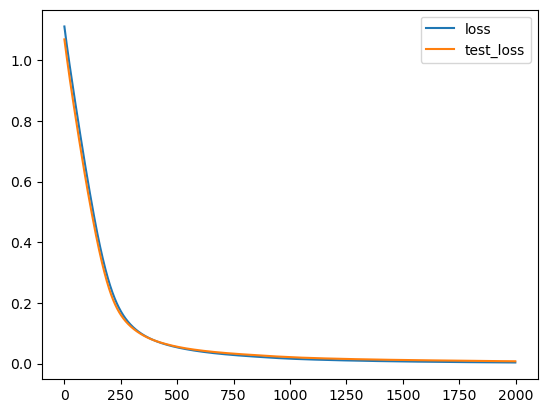

In [21]:
loss_df=pd.DataFrame({'loss':loss_o, 'test_loss':loss_t})
loss_df.plot()

# Evaluate

In [22]:
pred= model(test_X)
type(pred)

torch.Tensor

In [23]:
y_pred=pred.detach().numpy().argmax(axis=1)

In [24]:
accuracy_score(y_test,y_pred)

1.0

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [26]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
